In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import LSTM
import seaborn as sns
from keras.layers import Dropout

In [ ]:
df=pd.read_csv(r"/content/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [ ]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume


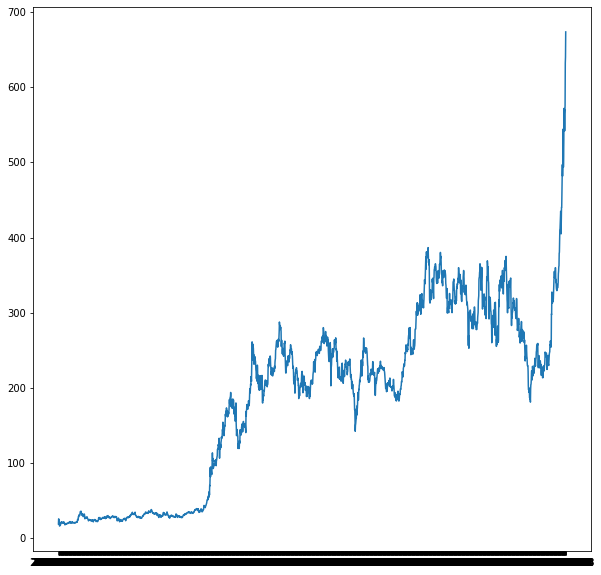

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df["Date"], df["Open"])
plt.show()

In [ ]:
df_open=df.iloc[:,1:2].values

In [ ]:
#Scaling the "open" data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
open_scaled = sc.fit_transform(df_open)
print(open_scaled)
type(open_scaled)

[[0.00434948]
 [0.01467569]
 [0.01347426]
 ...
 [0.93723668]
 [0.94876435]
 [1.        ]]


numpy.ndarray

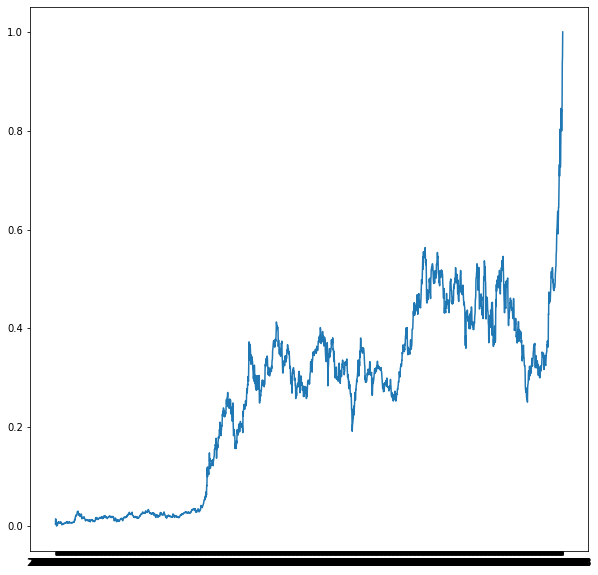

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df["Date"], open_scaled)
plt.show()

In [ ]:
train_size=int(0.80*len(df["Open"]))
open_train=open_scaled[0:train_size]
open_test=open_scaled[train_size:len(df["Open"])]

print(len(open_train))
print(len(open_test))

1932
484


In [ ]:
xtrain = []
ytrain = []

for i in range(60, len(open_train)):
    xtrain.append(open_train[i-60: i, 0])
    ytrain.append(open_train[i, 0])
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtrain

array([[0.00434948, 0.01467569, 0.01347426, ..., 0.00688921, 0.00722379,
        0.00719337],
       [0.01467569, 0.01347426, 0.01043267, ..., 0.00722379, 0.00719337,
        0.00570299],
       [0.01347426, 0.01043267, 0.00587028, ..., 0.00719337, 0.00570299,
        0.00579424],
       ...,
       [0.45800317, 0.44471143, 0.43996655, ..., 0.48572732, 0.5044331 ,
        0.51305604],
       [0.44471143, 0.43996655, 0.44157859, ..., 0.5044331 , 0.51305604,
        0.51723823],
       [0.43996655, 0.44157859, 0.434735  , ..., 0.51305604, 0.51723823,
        0.51164171]])

In [ ]:
model=keras.Sequential()

In [ ]:
model.add(LSTM(units = 64, return_sequences = True, input_shape = (xtrain.shape[1], 1)))
model.add(Dropout(rate = 0.2))

In [ ]:
##2nd lstm layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(rate = 0.2))
##3rd lstm layer
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(rate = 0.2))
##4th lstm layer
model.add(LSTM(units = 64, return_sequences = False))
model.add(Dropout(rate = 0.2))

In [ ]:
#Output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [ ]:
model.fit(
    xtrain,
    ytrain, 
    batch_size=32,
    epochs=100
    )

Epoch 1/100
59/59 [==============================] - 18s 159ms/step - loss: 0.0058
Epoch 2/100
59/59 [==============================] - 9s 157ms/step - loss: 0.0014
Epoch 3/100
59/59 [==============================] - 8s 142ms/step - loss: 0.0013
Epoch 4/100
59/59 [==============================] - 9s 155ms/step - loss: 0.0012
Epoch 5/100
59/59 [==============================] - 9s 161ms/step - loss: 0.0011
Epoch 6/100
59/59 [==============================] - 9s 161ms/step - loss: 9.9658e-04
Epoch 7/100
59/59 [==============================] - 8s 141ms/step - loss: 0.0012
Epoch 8/100
59/59 [==============================] - 9s 160ms/step - loss: 0.0010
Epoch 9/100
59/59 [==============================] - 9s 161ms/step - loss: 0.0012
Epoch 10/100
59/59 [==============================] - 9s 147ms/step - loss: 9.5560e-04
Epoch 11/100
59/59 [==============================] - 9s 154ms/step - loss: 8.1452e-04
Epoch 12/100
59/59 [==============================] - 10s 162ms/step - loss: 8.3166

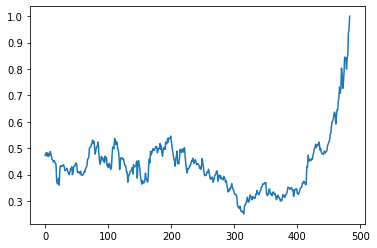

In [ ]:
plt.plot(open_test)
plt.show()

In [ ]:
inp=df_open[len(open_train)-60:]

In [ ]:
inp.reshape(-1,1)
inp

array([[306.5     ],
       [302.      ],
       [300.100006],
       [312.      ],
       [314.600006],
       [314.630005],
       [330.450012],
       [340.929993],
       [341.01001 ],
       [342.040009],
       [344.899994],
       [340.26001 ],
       [332.690002],
       [329.589996],
       [329.51001 ],
       [323.829987],
       [316.      ],
       [311.75    ],
       [316.179993],
       [312.      ],
       [321.      ],
       [312.869995],
       [316.619995],
       [316.      ],
       [335.160004],
       [332.200012],
       [335.23999 ],
       [338.630005],
       [337.540009],
       [340.470001],
       [345.670013],
       [345.      ],
       [349.399994],
       [360.      ],
       [354.579987],
       [348.269989],
       [341.5     ],
       [339.850006],
       [345.140015],
       [347.51001 ],
       [351.      ],
       [348.440002],
       [337.970001],
       [325.209991],
       [338.98999 ],
       [343.309998],
       [319.929993],
       [316.1

In [ ]:
inp=sc.transform(inp)
inp

array([[0.44157859],
       [0.434735  ],
       [0.4318455 ],
       [0.44994297],
       [0.45389705],
       [0.45394267],
       [0.47800169],
       [0.49393961],
       [0.4940613 ],
       [0.49562772],
       [0.49997718],
       [0.4929207 ],
       [0.48140826],
       [0.47669378],
       [0.47657214],
       [0.46793398],
       [0.45602616],
       [0.44956277],
       [0.45629989],
       [0.44994297],
       [0.46363014],
       [0.45126606],
       [0.45696904],
       [0.45602616],
       [0.48516463],
       [0.48066309],
       [0.48528627],
       [0.4904418 ],
       [0.48878414],
       [0.49324006],
       [0.50114822],
       [0.50012927],
       [0.50682076],
       [0.52294122],
       [0.51469848],
       [0.50510226],
       [0.49480648],
       [0.49229717],
       [0.5003422 ],
       [0.50394648],
       [0.50925405],
       [0.50536081],
       [0.48943807],
       [0.47003268],
       [0.49098926],
       [0.49755912],
       [0.46200288],
       [0.456

In [ ]:
xtest=[]
for i in range(60, len(inp)):
  xtest.append(inp[i-60: i, 0])

xtest = np.array(xtest)

In [ ]:
pred_open_scaled=model.predict(xtest)
pred_open_scaled

16/16 [==============================] - 1s 42ms/step


array([[0.50038743],
       [0.4810586 ],
       [0.47597936],
       [0.47769654],
       [0.47345433],
       [0.47678405],
       [0.47212994],
       [0.47226006],
       [0.47286832],
       [0.47987714],
       [0.47766215],
       [0.46986428],
       [0.4603493 ],
       [0.45467412],
       [0.4495121 ],
       [0.45036855],
       [0.44998896],
       [0.44653887],
       [0.44168475],
       [0.41066375],
       [0.3853361 ],
       [0.37286884],
       [0.37861273],
       [0.37520972],
       [0.39563975],
       [0.420834  ],
       [0.43224093],
       [0.43267685],
       [0.43164417],
       [0.43206352],
       [0.4339016 ],
       [0.43203568],
       [0.42331007],
       [0.41958374],
       [0.41901374],
       [0.42257282],
       [0.42229658],
       [0.41659194],
       [0.41141623],
       [0.40551966],
       [0.40710726],
       [0.41564047],
       [0.42122608],
       [0.42679268],
       [0.41464666],
       [0.40814123],
       [0.4166268 ],
       [0.426

In [ ]:
pred_open=sc.inverse_transform(pred_open_scaled)
pred_open

array([[345.16977],
       [332.46008],
       [329.1202 ],
       [330.24936],
       [327.4599 ],
       [329.64935],
       [326.58905],
       [326.67462],
       [327.0746 ],
       [331.6832 ],
       [330.22675],
       [325.09927],
       [318.84268],
       [315.11096],
       [311.71667],
       [312.27985],
       [312.03024],
       [309.76163],
       [306.56982],
       [286.17197],
       [269.51776],
       [261.31992],
       [265.0968 ],
       [262.85916],
       [276.2929 ],
       [292.8594 ],
       [300.36005],
       [300.64667],
       [299.96762],
       [300.24338],
       [301.452  ],
       [300.22507],
       [294.48755],
       [292.0373 ],
       [291.66248],
       [294.00278],
       [293.82114],
       [290.07004],
       [286.66675],
       [282.78946],
       [283.83337],
       [289.4444 ],
       [293.11722],
       [296.77753],
       [288.79092],
       [284.51328],
       [290.09296],
       [296.90375],
       [300.1965 ],
       [304.44925],


In [ ]:
open_test_unscaled=df_open[train_size:len(df["Open"])]

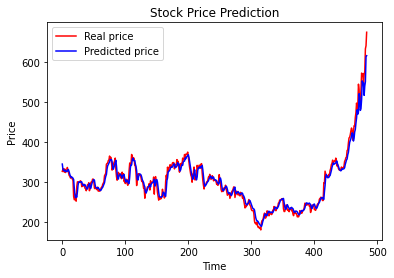

In [ ]:
plt.plot(open_test_unscaled, color = 'red', label = 'Real price')
plt.plot(pred_open, color = 'blue', label = 'Predicted price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()